# 1.6 MILLION UK TRAFFIC ACCIDENTS

Problem tanımı ve amaç: Bu veri seti UK’de 2000-2016 yıllarına ait 1.6 milyondan fazla trafik kazası verilerini içermektedir. Bu veri seti aracılığıyla aşağıdaki gibi sorulara yanıt aranmaktadır.

Trafik akışının değişmesi kazaları nasıl etkiler?
Kaza oranlarını ne artırır?
Zaman içinde kaza oranlarını tahmin edebilir miyiz?
Kırsal ve kentsel alanlar nasıl farklılaştı?

In [44]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [45]:
data1 = pd.read_csv("accidents_2005_to_2007.csv")
data2 = pd.read_csv("accidents_2009_to_2011.csv" )
data3 = pd.read_csv("accidents_2012_to_2014.csv")
alldata = pd.concat([data1,data2,data3])

C:\Users\ilayd\AppData\Local\Temp\ipykernel_712\1365006526.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("accidents_2005_to_2007.csv")
C:\Users\ilayd\AppData\Local\Temp\ipykernel_712\1365006526.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv("accidents_2012_to_2014.csv")


In [46]:
alldata.shape

(1504150, 33)

In [47]:
alldata.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [48]:
alldata

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [49]:
alldata = alldata.loc[:,["Accident_Severity", # kaza şiddeti
                         "Number_of_Casualties", # Kayıp Sayısı
                         "Number_of_Vehicles", #araç sayısı
                         "Day_of_Week",# Haftanın Günü
                         "Date",# Tarih
                         "Time",#Saat
                         "Local_Authority_(District)",# Yerel Yönetim (Bölge)
                         "Local_Authority_(Highway)",# Yerel Yönetim (Otoyol)
                         "Road_Type", # Yol Tipi
                         "Speed_limit",# Hız sınırı
                         "Light_Conditions",# ışık koşulları
                         "Weather_Conditions",# hava koşulları
                        "Road_Surface_Conditions",# yol Yüzey Koşulları
                         "Year",# Yıl
                         "Urban_or_Rural_Area",  #Kentsel veya Kırsal Alan 
                         "Carriageway_Hazards" #Anayol Tehlikeleri
     
                         
                         
                        ]]


In [50]:
alldata.head(10)

,Accident_Severity,Number_of_Casualties,Number_of_Vehicles,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year,Urban_or_Rural_Area,Carriageway_Hazards
0,2,1,1,3,04/01/2005,17:42,12,E09000020,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,2005,1,None
1,3,1,1,4,05/01/2005,17:36,12,E09000020,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,1,None
2,3,1,2,5,06/01/2005,00:15,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,1,None
3,3,1,1,6,07/01/2005,10:35,12,E09000020,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2005,1,None
4,3,1,1,2,10/01/2005,21:13,12,E09000020,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,2005,1,None
5,3,1,2,3,11/01/2005,12:40,12,E09000020,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,2005,1,None
6,3,1,2,5,13/01/2005,20:40,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,1,None
7,3,2,1,6,14/01/2005,17:35,12,E09000020,Dual carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2005,1,None
8,3,2,2,7,15/01/2005,22:43,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,1,None
9,3,5,2,7,15/01/2005,16:00,12,E09000020,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2005,1,None


In [51]:
alldata= alldata.dropna()

In [52]:
alldata.isnull().sum()

Accident_Severity             0
Number_of_Casualties          0
Number_of_Vehicles            0
Day_of_Week                   0
Date                          0
Time                          0
Local_Authority_(District)    0
Local_Authority_(Highway)     0
Road_Type                     0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Year                          0
Urban_or_Rural_Area           0
Carriageway_Hazards           0
dtype: int64

# Number of Accidents by Year

In [53]:
alldata.Year = alldata.Year.astype(str)
yila_gore_kaza_sayisi = alldata.groupby("Year")

In [54]:
toplam_yila_gore_kaza_sayisi=pd.DataFrame(yila_gore_kaza_sayisi.size().sort_values(ascending=False),columns=["Number"])

In [55]:
toplam_yila_gore_kaza_sayisi

,Number
Year,
2005,198461
2006,188911
2007,181881
2012,179436
2009,163331
2010,154185
2011,151241
2014,146099
2013,138392


Text(0.5, 1.0, 'Yıllara göre toplam kaza sayısı')

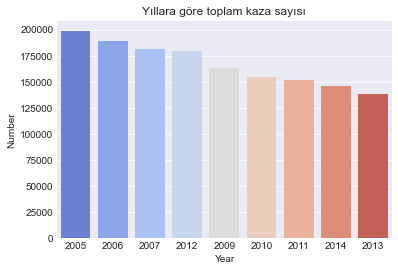

In [56]:
sns.barplot(y = toplam_yila_gore_kaza_sayisi["Number"] , x = toplam_yila_gore_kaza_sayisi.index,palette = "coolwarm")
plt.title("Yıllara göre toplam kaza sayısı")

# Number of Accidents by Factor


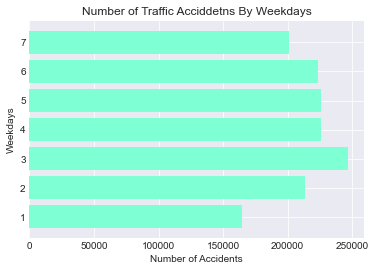

In [57]:
week = alldata["Day_of_Week"].value_counts()
week
weeks = alldata["Day_of_Week"].unique()
weekvalue = week.values

plt.barh(weeks,weekvalue,color="aquamarine")
plt.title("Number of Traffic Acciddetns By Weekdays")
plt.xlabel("Number of Accidents")
plt.ylabel("Weekdays")
plt.show()

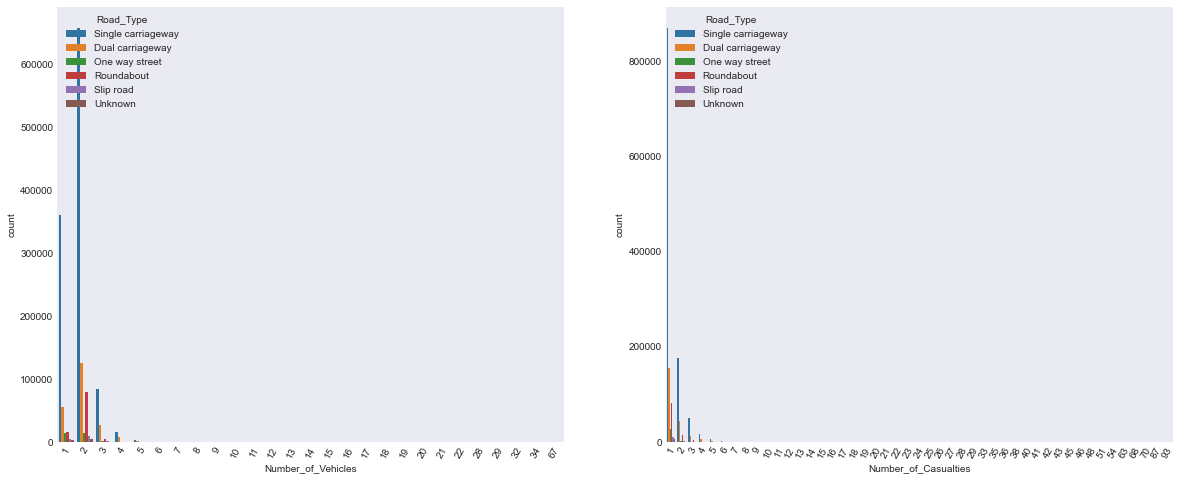

In [58]:
arac_insan_sayi = ["Number_of_Vehicles", "Number_of_Casualties"]

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.countplot(x=alldata.Number_of_Vehicles, hue="Road_Type",
            data=alldata)
plt.grid(False)
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
sns.countplot(x=alldata.Number_of_Casualties, hue="Road_Type",
            data=alldata)
plt.grid(False)
plt.xticks(rotation=60)


plt.show()

Text(0, 0.5, 'Number Of Accidents')

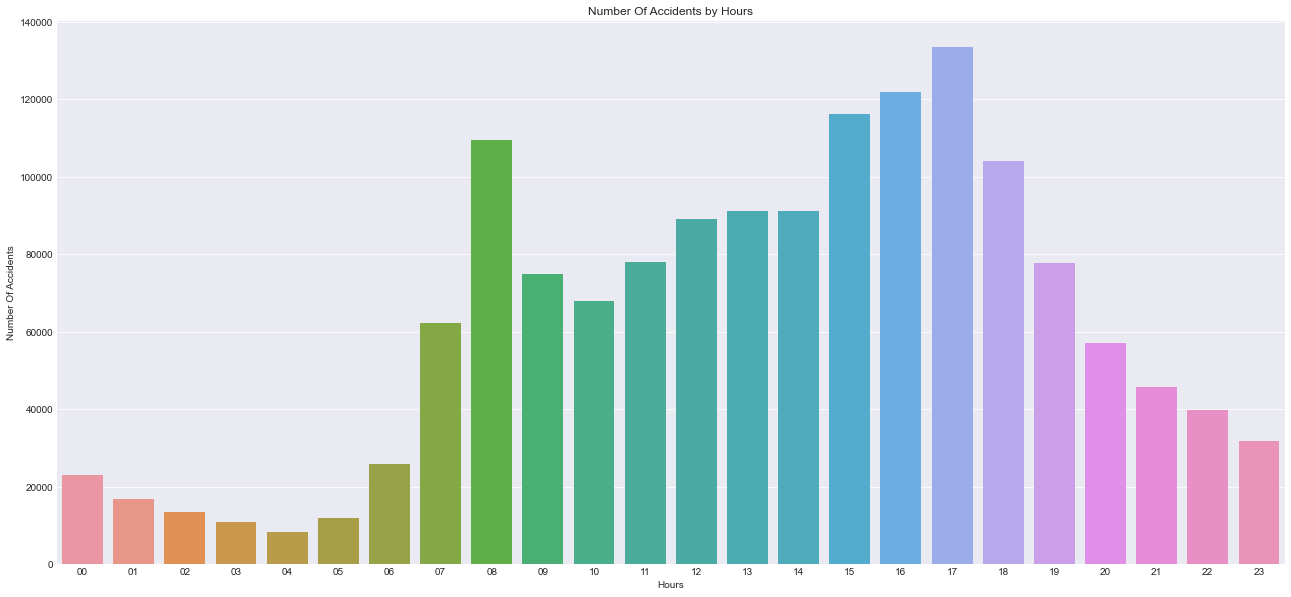

In [59]:
hours = pd.DataFrame(alldata["Time"].astype("datetime64"))
hours = pd.DataFrame(hours.Time.dt.strftime('%H').sort_values(),columns=["Time"])

plt.figure(figsize=(22,10))
sns.countplot(data=hours,x="Time")
plt.title("Number Of Accidents by Hours")
plt.xlabel("Hours")
plt.ylabel("Number Of Accidents")

# Accident Severity by Road Type

In [60]:
rt = alldata["Road_Type"].value_counts()

rts = alldata["Road_Type"].unique()
count_rt=rt.values


Text(0.5, 1.0, 'Road Type effects on Accidents')

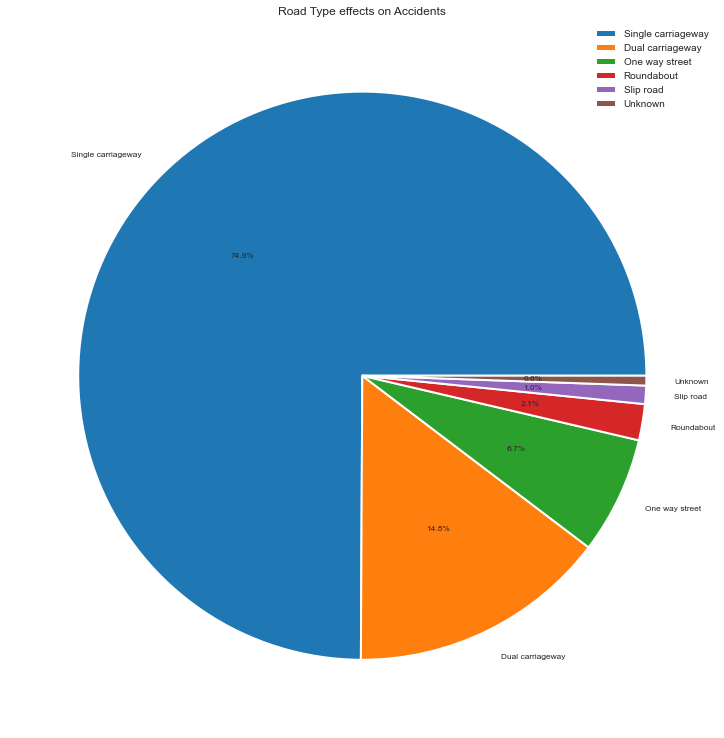

In [61]:
plt.figure(figsize=(28,18))
plt.subplot(1,2,1)
plt.pie(count_rt, labels=rts,autopct='%1.1f%%',textprops={"size": "small"}, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' } )
plt.legend(loc ="upper right")
plt.title("Road Type effects on Accidents")

[Text(0.5, 1.0, 'Road Type effects on Accident Severity')]

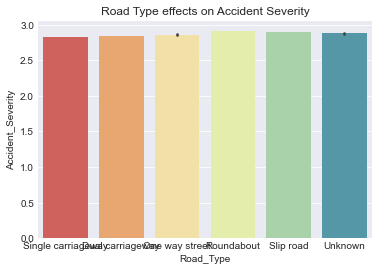

In [62]:
sns.barplot(y =alldata["Accident_Severity"], x = alldata["Road_Type"],palette = "Spectral").set(title='Road Type effects on Accident Severity')

# The Impact  of Weather Events on Roads

In [63]:
road_vc = alldata["Road_Surface_Conditions"].value_counts()
road_vc_uniq = alldata["Road_Surface_Conditions"].unique()
road_num_value = road_vc.values

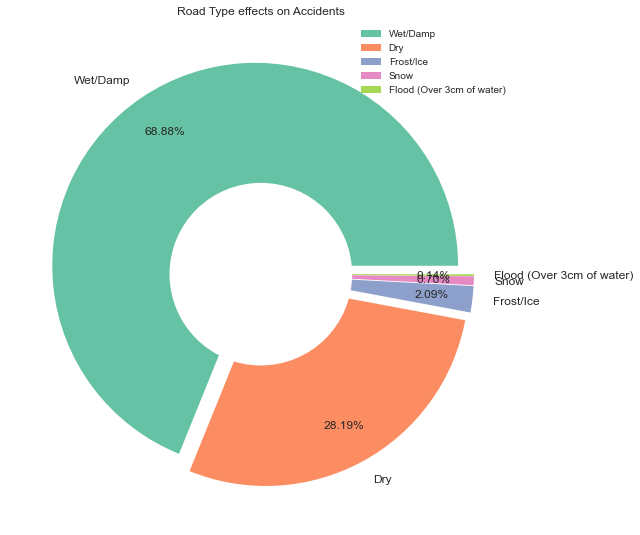

In [64]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
colors = []
plt.pie(road_num_value, labels=road_vc_uniq ,
        autopct='%1.2f%%',
        textprops={"size": "large"} ,
        colors=sns.color_palette('Set2'),
        pctdistance=0.80,
        explode=[0.05, 0.05, 0.05, 0.05, 0.05])

plt.legend(loc ="upper right")
plt.title("Road Type effects on Accidents")

hole = plt.Circle((0, 0), 0.45, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

In [65]:
alldata

,Accident_Severity,Number_of_Casualties,Number_of_Vehicles,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year,Urban_or_Rural_Area,Carriageway_Hazards
0,2,1,1,3,04/01/2005,17:42,12,E09000020,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,2005,1,None
1,3,1,1,4,05/01/2005,17:36,12,E09000020,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,1,None
2,3,1,2,5,06/01/2005,00:15,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2005,1,None
3,3,1,1,6,07/01/2005,10:35,12,E09000020,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2005,1,None
4,3,1,1,2,10/01/2005,21:13,12,E09000020,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,2005,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2,1,2,1,07/12/2014,22:20,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Snowing without high winds,Snow,2014,2,None
464693,3,2,2,5,11/12/2014,06:40,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Snow,2014,2,None
464694,3,1,1,3,09/12/2014,02:00,917,S12000006,Single carriageway,40,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2014,2,None
464695,2,2,3,4,17/12/2014,06:55,917,S12000006,Single carriageway,60,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2014,2,None


# What is the Difference Between Urban and Rural Area Traffic Accidents Risks?


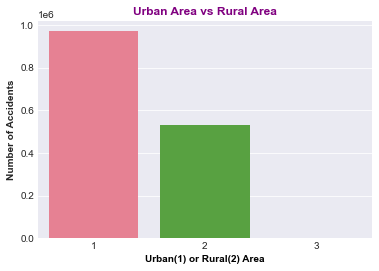

In [66]:
alldata["Urban_or_Rural_Area"].value_counts()
plt.style.use("seaborn-darkgrid")

sns.countplot(x="Urban_or_Rural_Area",data=alldata,palette = "husl")
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold",color = "black")
plt.title("Urban Area vs Rural Area",weight="bold" , color = "purple")

plt.show() 

# Corelation Between Variables

<AxesSubplot:>

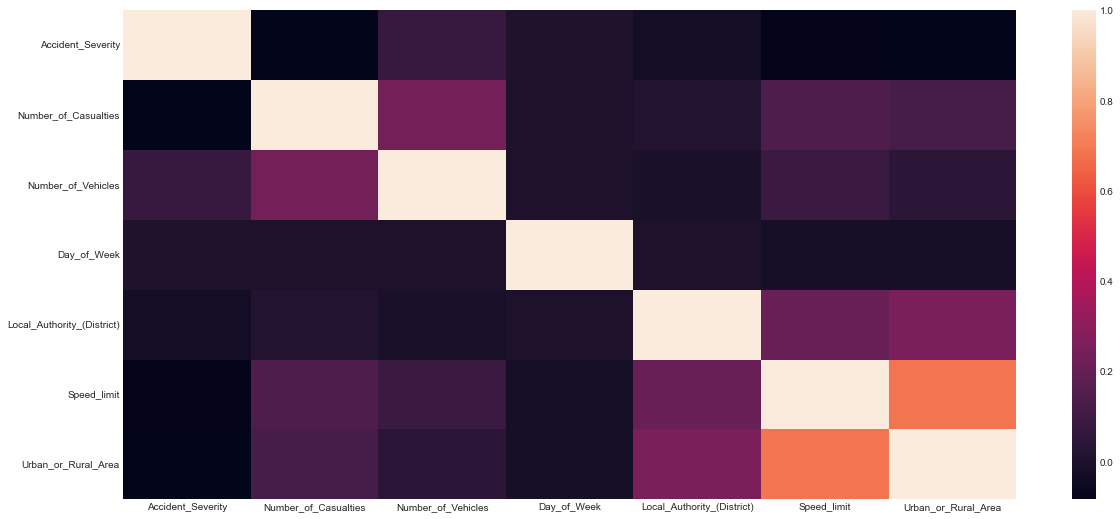

In [67]:
corr =  alldata.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [83]:
alldata.drop(["Date"], axis=1, inplace=True)

In [84]:
alldata.drop(["Time"], axis=1, inplace=True)

KeyError: "['Time'] not found in axis"

In [88]:
alldata.drop(["Carriageway_Hazards"], axis=1, inplace=True)

In [91]:
alldata.drop(["Speed_limit"], axis=1, inplace=True)

In [93]:
alldata.drop(["Local_Authority_(District)"], axis=1, inplace=True)

In [95]:
alldata.drop(["Local_Authority_(Highway)"], axis=1, inplace=True)

# Model

### CLEARING REPETITIVE VALUES

In [70]:
alldata["Road_Type"].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [71]:
alldata["Weather_Conditions"].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

In [72]:
alldata["Light_Conditions"].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [77]:
alldata["Road_Surface_Conditions"].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)'], dtype=object)

In [78]:

alldata["Road_Type"]=[1 if each == "Single carriageway" else 2
                          if each == "Dual carriageway" else 3
                          if each == "One way street" else 4
                          if each == "Roundabout" else 5
                          if each == "Slip road" else 6
                          for each in alldata["Road_Type"]]

In [79]:
alldata["Weather_Conditions"].unique()
alldata["Weather_Conditions"]=[1 if each == "Raining without high winds" else 2
                          if each == "Fine without high winds" else 3
                          if each == "Unknown" else 4
                          if each == "Snowing without high winds" else 5
                          if each == "Other" else 6
                          if each == "Fine with high winds" else 7
                          if each == "Raining with high winds" else 8
                          if each == "Fog or mist" else 9         
                          for each in alldata["Weather_Conditions"]]

In [80]:
alldata["Road_Surface_Conditions"]=[1 if each == "Wet/Damp" else 2
                          if each == "Dry" else 3
                          if each == "Frost/Ice" else 4
                          if each == "Snow" else 5       
                          for each in alldata["Road_Surface_Conditions"]]

In [81]:
alldata["Light_Conditions"]=[1 if each == "Daylight: Street light present" else 2
                          if each == "Darkness: Street lights present and lit" else 3
                          if each == "Darkness: Street lighting unknown" else 4
                          if each == "Darkness: Street lights present but unlit" else 5  
                          if each == "Darkeness: No street lighting" else 6
                          for each in alldata["Light_Conditions"]]

In [96]:
alldata.head()


,Accident_Severity,Number_of_Casualties,Number_of_Vehicles,Day_of_Week,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year,Urban_or_Rural_Area
0,2,1,1,3,6,1,9,1,2005,1
1,3,1,1,4,6,2,9,2,2005,1
2,3,1,2,5,6,2,9,2,2005,1
3,3,1,1,6,6,1,9,2,2005,1
4,3,1,1,2,6,3,9,1,2005,1


In [97]:
X = alldata.drop(["Accident_Severity"],axis=1).values
y = alldata["Accident_Severity"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1201549, 9), (300388, 9), (1201549,), (300388,))

# Random Forest Regression

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
import time
from sklearn.ensemble import RandomForestRegressor

time_start = time.time()


In [100]:
regressor = RandomForestRegressor(n_estimators=100, max_features = 0.5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

time_end = time.time() 
print(f'Run time : {time_end - time_start}')

Run time : 150.2518174648285


In [101]:
from sklearn import metrics

print('Training Score: ', regressor.score(X_train, y_train))
print('Testing Score:  ', regressor.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training Score:  0.07536516942704774
Testing Score:   0.020973761813434688
Root Mean Squared Error: 0.39794303456207347
